<a href="https://colab.research.google.com/github/IRFO4IK2/example/blob/main/labi%204-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Данные загружены и записаны в dataframe!
(195, 43)
Matplotlib version:  3.10.0


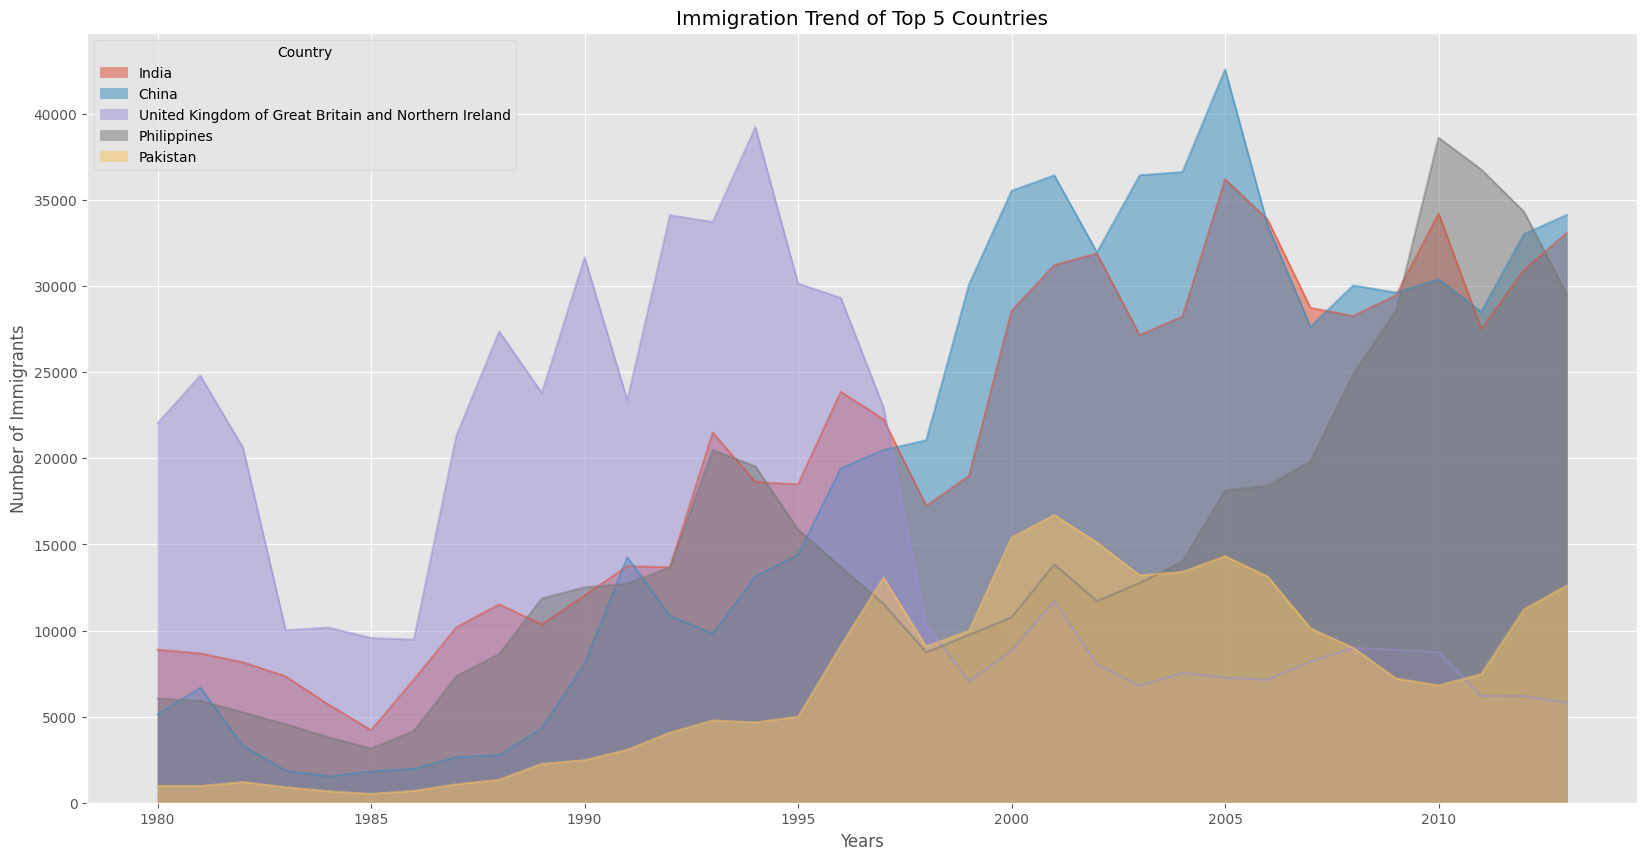

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


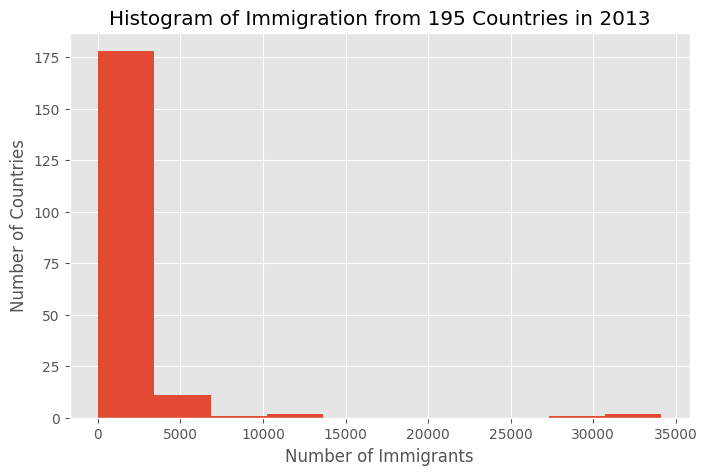

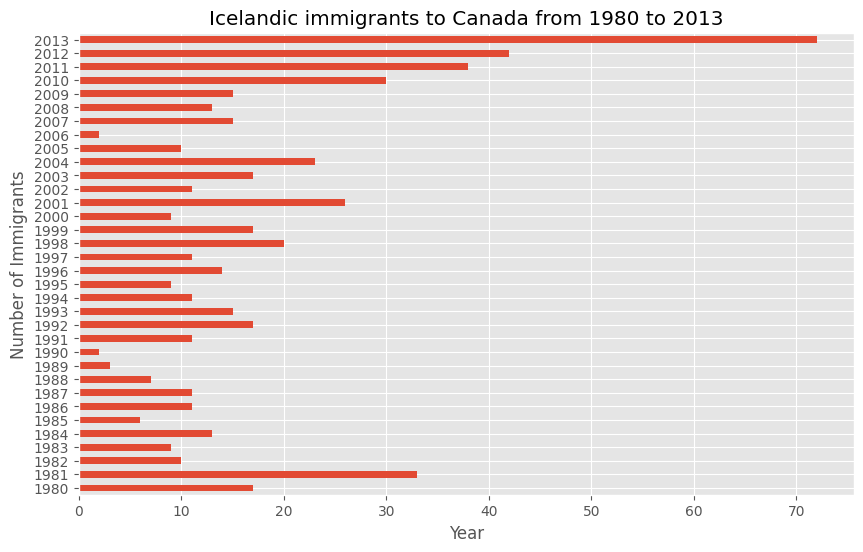

In [23]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Загружаем данные из Excel
df_can = pd.read_excel(
    'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
)
print('Данные загружены и записаны в dataframe!')

# Выводим первые строки таблицы
df_can.head()

# Выводим размерность таблицы
print(df_can.shape)

# Удаляем лишние столбцы
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head()

# Переименовываем столбцы
df_can.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)
df_can.head()

# Проверяем, все ли столбцы строковые
all(isinstance(column, str) for column in df_can.columns)

# Преобразуем столбцы в строки
df_can.columns = list(map(str, df_can.columns))

# Проверяем снова
all(isinstance(column, str) for column in df_can.columns)

# Устанавливаем индекс по стране
df_can.set_index('Country', inplace=True)
df_can.head()

# Добавляем столбец Total с суммой по строкам
# Преобразуем все данные в числовые, где возможно (нечисловые заменятся на NaN)
df_can[years] = df_can[years].apply(pd.to_numeric, errors='coerce')

# Теперь можно добавить столбец Total с суммой по строкам
df_can['Total'] = df_can[years].sum(axis=1)
df_can.head()

df_can.head()

# Создаём список годов для сортировки
years = list(map(str, range(1980, 2014)))

# Сортируем данные по столбцу Total
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5 = df_can.head()

# Транспонируем таблицу для топ-5 стран
df_top5 = df_top5[years].transpose()
df_top5.head()

# Устанавливаем стиль графика ggplot
mpl.style.use('ggplot')

# Проверяем версию Matplotlib
print('Matplotlib version: ', mpl.__version__)  # >= 2.0.0

# Преобразуем индекс в целые числа для корректного отображения
df_top5.index = df_top5.index.map(int)

# Построение графика типа 'area'
df_top5.plot(
    kind='area',
    stacked=False,
    figsize=(20, 10),  # размер области построения графика
)

# Задаем наименование графика
plt.title('Immigration Trend of Top 5 Countries')

# Задаем наименование оси Y
plt.ylabel('Number of Immigrants')

# Задаем наименование оси X
plt.xlabel('Years')

# Выводим график
plt.show()







# Проверяем данные для 2013 года
df_can['2013'].head()

# np.histogram возвращает два значения
count, bin_edges = np.histogram(df_can['2013'])

# Выводим частоту появления данных
print(count)  # подсчет частоты появления данных

# Выводим количество столбцов, по умолчанию – 10
print(bin_edges)

# Строим гистограмму для данных за 2013 год
df_can['2013'].plot(kind='hist', figsize=(8, 5))

# Добавляем название графика
plt.title('Histogram of Immigration from 195 Countries in 2013')

# Добавляем наименование оси Y
plt.ylabel('Number of Countries')

# Добавляем наименование оси X
plt.xlabel('Number of Immigrants')

# Отображаем график
plt.show()

# Шаг 1: получаем данные для Исландии
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

# Шаг 2: строим горизонтальную столбчатую диаграмму
df_iceland.plot(kind='barh', figsize=(10, 6))

# Добавляем наименование оси X
plt.xlabel('Year')

# Добавляем наименование оси Y
plt.ylabel('Number of Immigrants')

# Добавляем название графика
plt.title('Icelandic immigrants to Canada from 1980 to 2013')

# Отображаем график
plt.show()
